Домашнее задание.

Потренируем навыки, полученные на практическом занятии. 
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. 
Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data =  pd.read_csv(load_boston()['filename'], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()['DESCR'])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.


In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import pearsonr
from scipy import stats
from sklearn.datasets import load_boston
import sklearn.linear_model as lm
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [189]:
#print(load_boston()['DESCR'])

In [224]:
data = pd.read_csv('boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [225]:
data.info()# NaN -ов нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [226]:
data.drop_duplicates() #Дубликатов нет

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


1. Пустые значения отсутствуют

In [359]:
data.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


2. Изучили выбросы, записали значения на очистку+ отобразили heatmap и выявили менее и более зависимые признаки

2. Посмотреть описание значений, убрать не нужные столбцы:
     - + CRIM     per capita crime rate by town- это уровень преступности на душу населения 
                     (есть выбросы резать выше 10)
     - + ZN       proportion of residential land zoned for lots over 25,000 sq.ft.- это долядоля жилой земли на город 
                     (есть выбросы резать выше 30)
     - + INDUS    proportion of non-retail business acres per town- доля не-розничного бизнеса на город 
                     (выбросов нет)
     - - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)- признак границы с рекой?                              категорийный, 0/1, - можно убрать - УДАЛЕНО!
     - + NOX      nitric oxides concentration (parts per 10 million)- содержание оксидов азота- экологическая обстановка
                   (выбросов нет)  
     - + RM       average number of rooms per dwelling- среднее количество комнат на жилище
                    (выбросы меньше 4,5 и больше 8) 
     - + AGE      proportion of owner-occupied units built prior to 1940-доля занятых помещений (косвенно показывает спрос)
                    (выбросов нет)   
     - + DIS      weighted distances to five Boston employment centres- совокупное расстояние до 5ти центров занятости 
                     (выбросы больше 10)
     - + RAD      index of accessibility to radial highways- индекс доступности магистралей
                     (выбросов нет)
     - + TAX      full-value property-tax rate per $10,000- ставка налога
                     (выбросов нет)
     - + PTRATIO  pupil-teacher ratio by town- соотношение учеников и учитилей
                     (выбросы ниже 13)
     - + B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town- Доля чернокожего населения
                 (выбросы ниже 340)
     - + LSTAT    % lower status of the population это % малообеспеченного населения
                     (выбросы ниже 30)
     - + MEDV     Median value of owner-occupied homes in $1000's- средняя стоимость домов
     

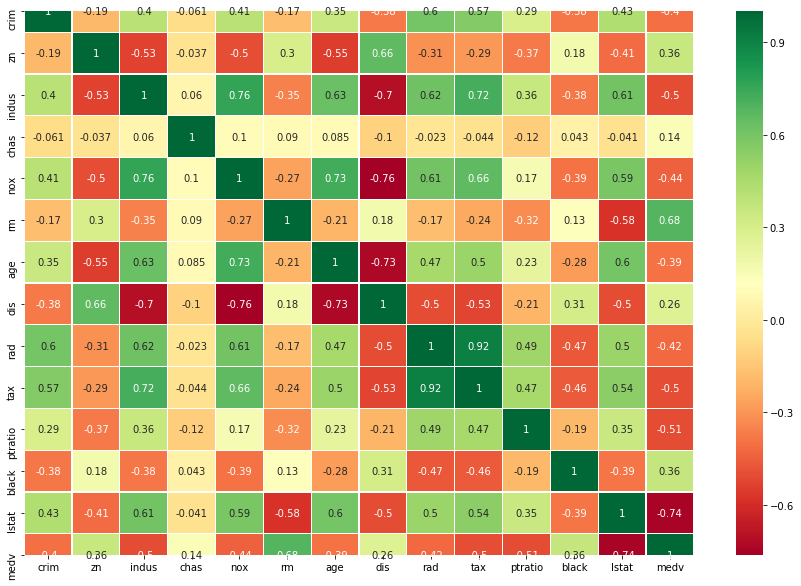

In [228]:
sns.heatmap(data= data.corr(), annot=True,cmap='RdYlGn',linewidths=0.2)

Проверяем выбросы

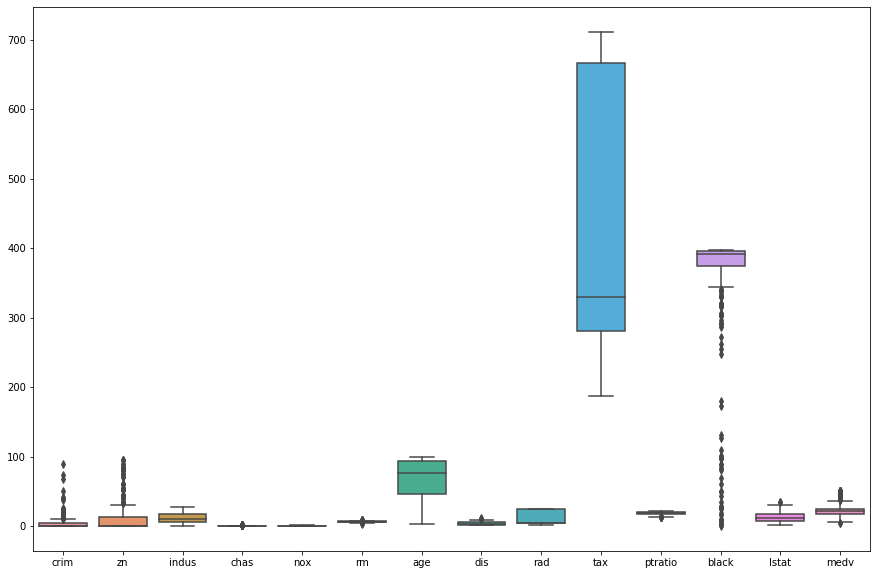

In [276]:
sns.boxplot(data = data)

Удаляем выбросы:

In [388]:
data_new = data.loc[data['crim'] < 10]
data_new = data_new.loc[data_new['zn'] < 30]
data_new = data_new.loc[data_new['rm'] < 8]
data_new = data_new.loc[data_new['rm'] > 3.5]
data_new = data_new.loc[data_new['dis'] < 10]
data_new = data_new.loc[data_new['ptratio'] > 13]
data_new = data_new.loc[data_new['black'] > 370]
data_new = data_new.loc[data_new['tax'] < 500]
data_new = data_new.loc[data_new['medv'] < 44]
data_new = data_new.loc[data_new['medv']<40]
data_new.drop(['chas'],axis=1,inplace = True)
#data_new.drop(['black'],axis=1,inplace = True)
#data_new.drop(['zn'],axis=1,inplace = True)
#data_new.drop(['dis'],axis=1,inplace = True)

#data_new = data_new.loc[data_new['lstat'] > 30]
#black, dis,zn

In [389]:
data_new.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.278742,4.169355,8.819516,0.506709,6.221425,62.740323,4.276755,4.408602,301.059140,18.491398,391.685753,11.172097,22.768817
std,0.500077,8.422112,5.300592,0.075406,0.449982,25.965531,1.695726,1.564723,65.366176,1.690268,6.482561,5.312660,5.017052
min,0.006320,0.000000,1.380000,0.409000,4.903000,2.900000,1.321600,1.000000,188.000000,14.700000,370.310000,2.940000,11.800000
25%,0.068907,0.000000,5.640000,0.449000,5.892000,45.025000,2.849275,4.000000,270.000000,17.800000,389.500000,7.457500,19.600000
50%,0.136145,0.000000,7.625000,0.499000,6.163500,65.250000,4.071100,4.000000,296.000000,18.600000,394.065000,9.970000,22.000000
75%,0.253167,0.000000,10.590000,0.538000,6.469500,84.950000,5.412100,5.000000,330.000000,19.500000,396.900000,13.450000,24.600000
max,4.097400,28.000000,25.650000,0.871000,7.765000,100.000000,9.222900,8.000000,437.000000,21.200000,396.900000,30.810000,39.800000


In [391]:
data_new.median()

crim         0.136145
zn           0.000000
indus        7.625000
nox          0.499000
rm           6.163500
age         65.250000
dis          4.071100
rad          4.000000
tax        296.000000
ptratio     18.600000
black      394.065000
lstat        9.970000
medv        22.000000
dtype: float64

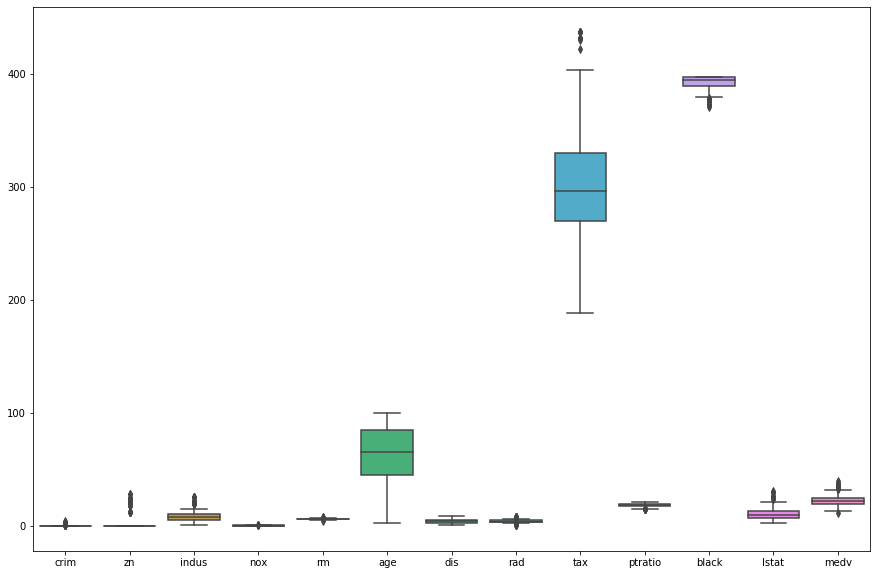

In [392]:
sns.boxplot(data = data_new)

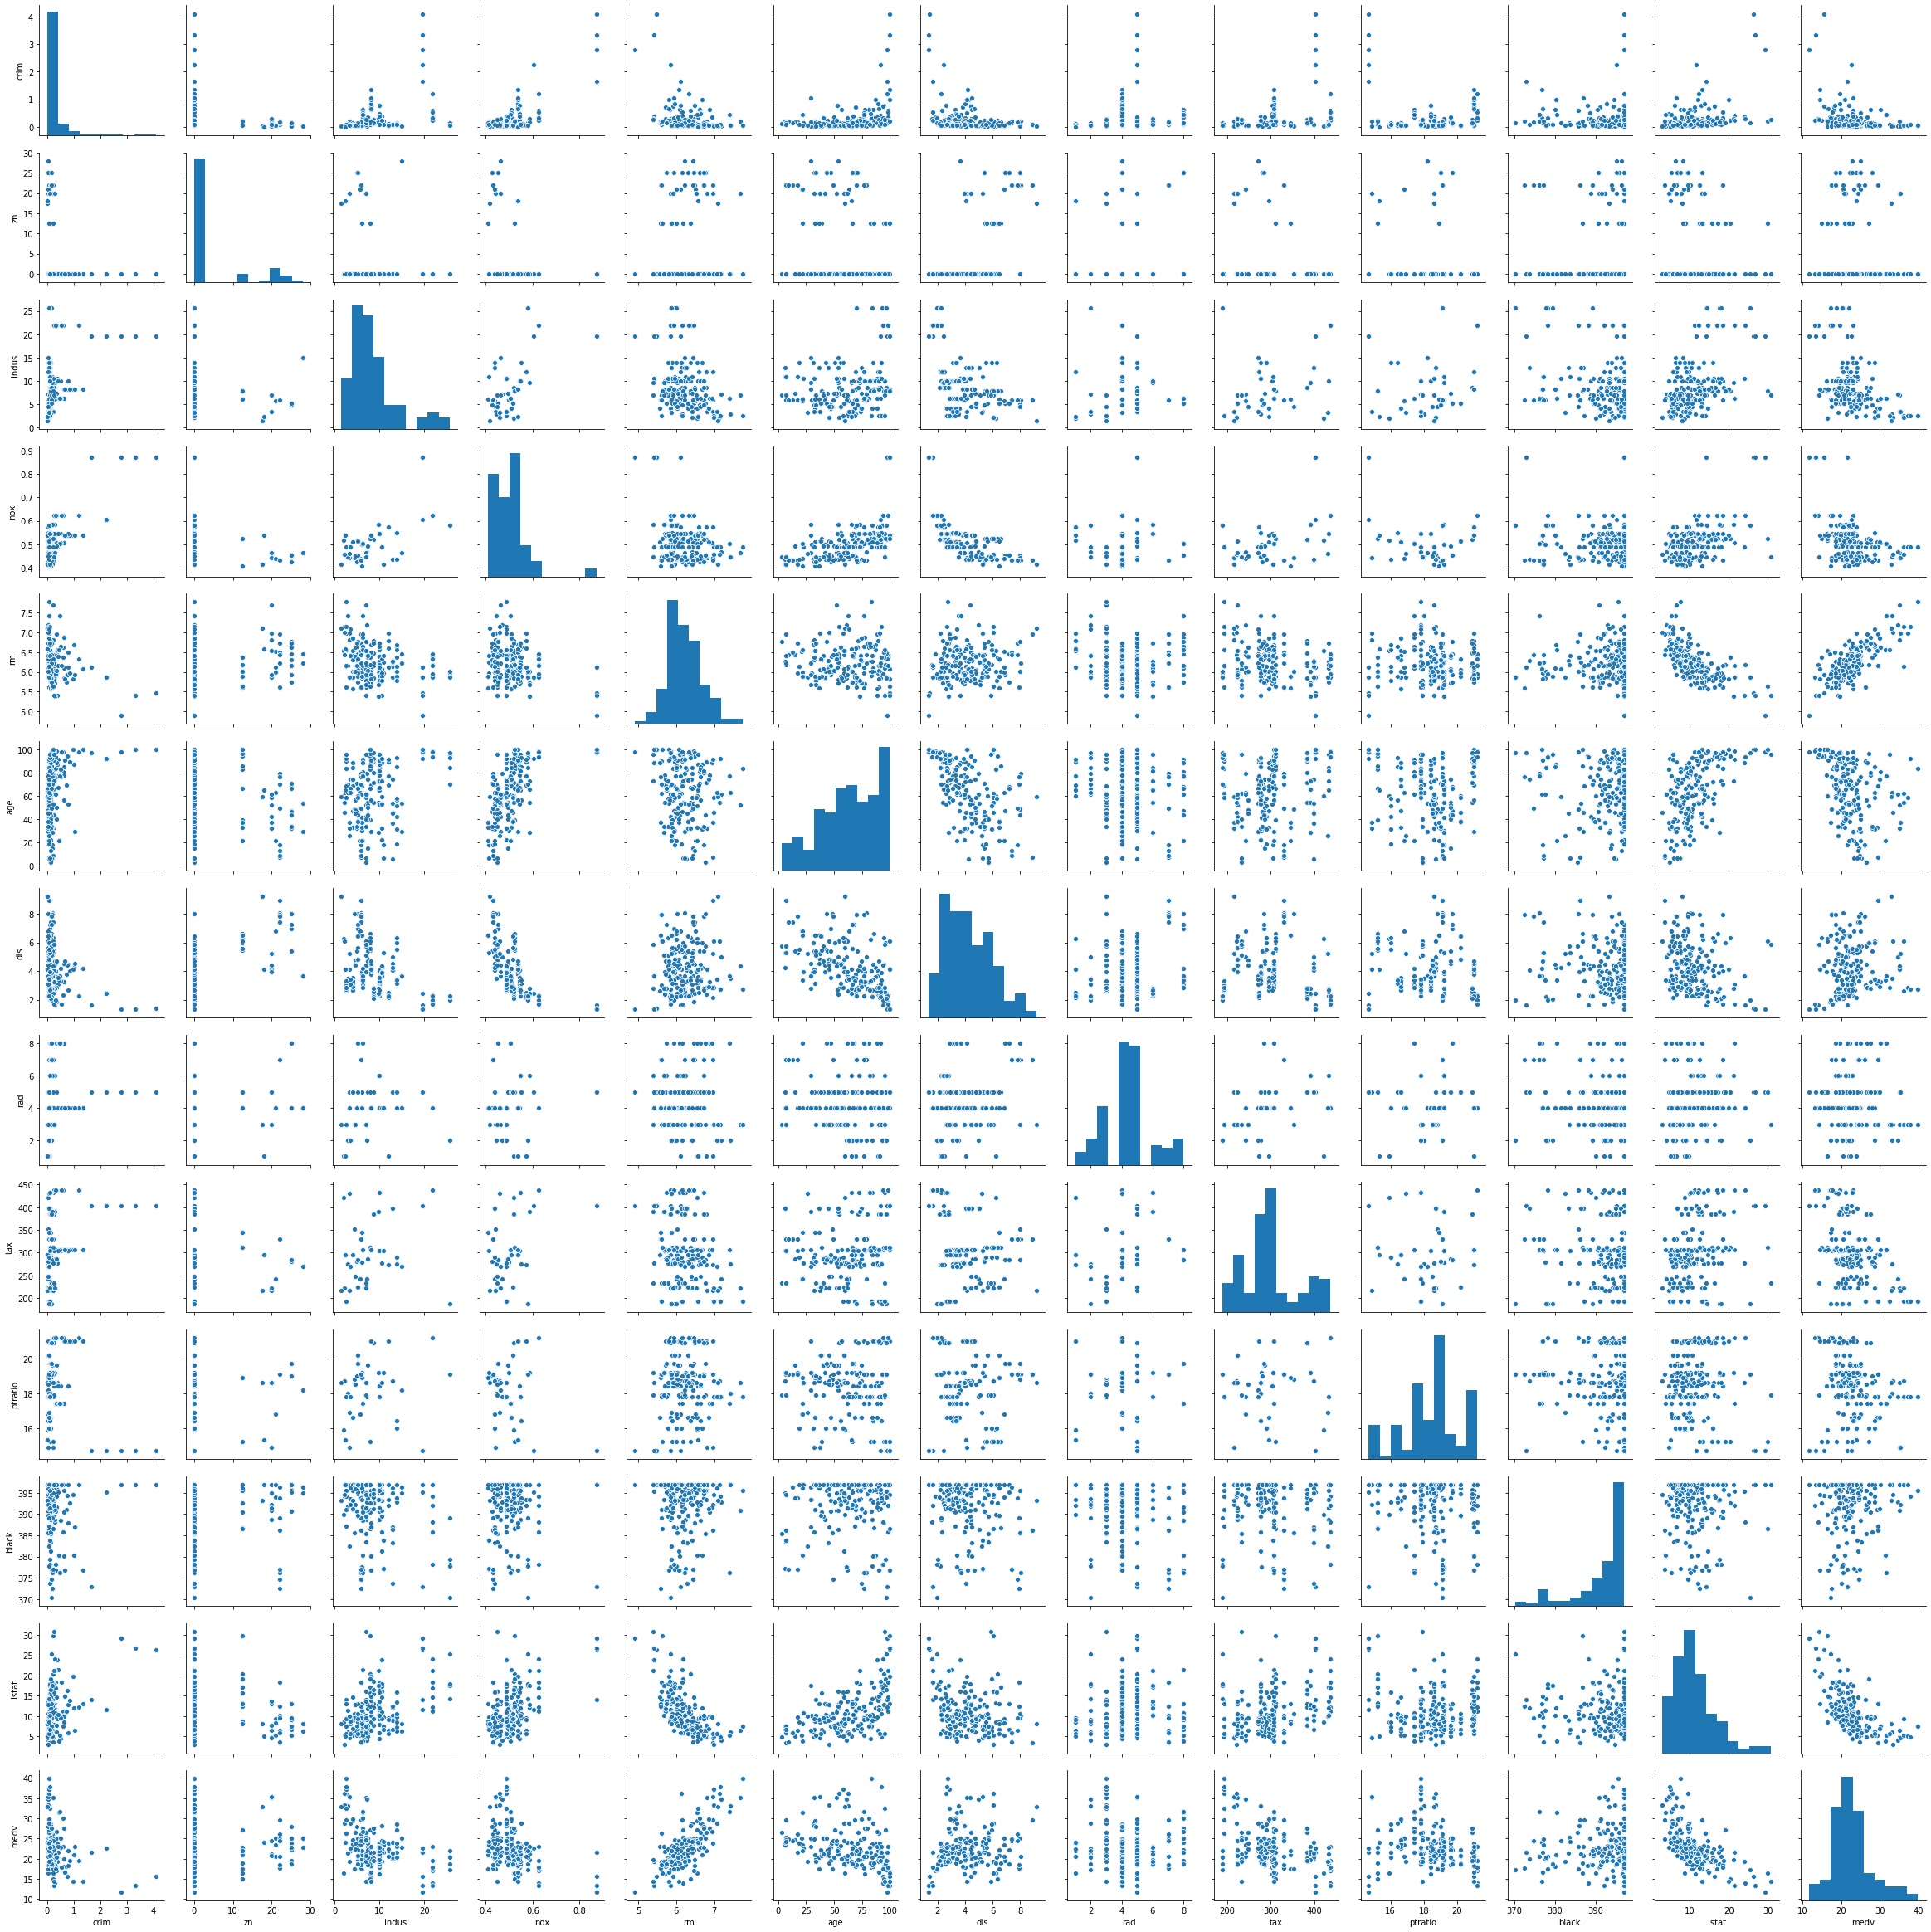

In [386]:
sns.pairplot(data_new)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184F8D541C8>,
      dtype=object)

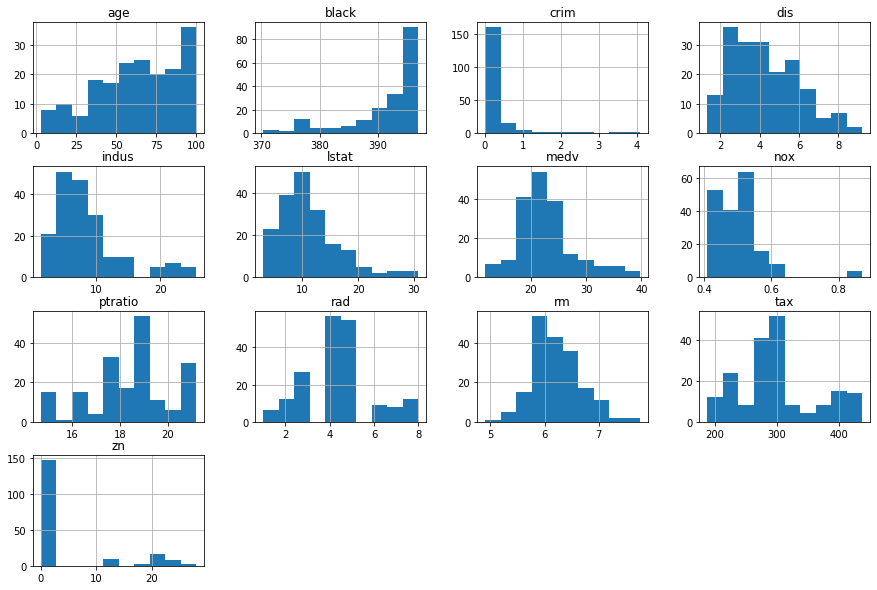

In [393]:
data_new.hist()

Расчёт показателей ошибки оригинального dataset (data)

In [394]:
from sklearn.metrics import mean_absolute_error

X = data[['crim', 'zn', 'indus', 'nox', 'rm','age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = data['medv']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['crim', 'zn', 'indus', 'nox', 'rm','age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.19746692e-01  4.07893057e-02  2.32215996e-02 -1.48256695e+01
  4.02449376e+00 -3.45633716e-03 -1.34576941e+00  2.85790086e-01
 -1.36848331e-02 -9.32548612e-01  8.57366079e-03 -5.15432462e-01]
Bias: 33.78742339712058
Error: 3.0902067912680473


Расчёт показателей ошибки изменённого dataset (data_new)

In [395]:
from sklearn.metrics import mean_absolute_error

X = data_new[['crim', 'zn', 'indus', 'nox', 'rm','age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = data_new['medv']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 4.44903812e-01 -1.11294548e-03 -9.07769600e-02 -1.02177385e+01
  7.05027391e+00 -4.24640551e-02 -9.76661435e-01  4.23194677e-01
 -2.18690590e-02 -5.68136521e-01  1.50913059e-02 -1.94776167e-02]
Bias: 1.136254513153908
Error: 1.7972163905517131


Пытался создать совокупный признак из нескольких имеющихся, уменьшить размерность признаков, НО к сожалению ничего лучше уже не пришло....  